<a href="https://colab.research.google.com/github/AimanHafizi619/My-Work/blob/main/EDA_for_1M_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
filename = "/content/drive/MyDrive/Colab Notebooks/1000000 Sales Records.csv"
df = pd.read_csv(filename)

In [5]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


In [6]:
df.info(), print(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Region          1000000 non-null  object 
 1   Country         1000000 non-null  object 
 2   Item Type       1000000 non-null  object 
 3   Sales Channel   1000000 non-null  object 
 4   Order Priority  1000000 non-null  object 
 5   Order Date      1000000 non-null  object 
 6   Order ID        1000000 non-null  int64  
 7   Ship Date       1000000 non-null  object 
 8   Units Sold      1000000 non-null  int64  
 9   Unit Price      1000000 non-null  float64
 10  Unit Cost       1000000 non-null  float64
 11  Total Revenue   1000000 non-null  float64
 12  Total Cost      1000000 non-null  float64
 13  Total Profit    1000000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 106.8+ MB



(None,
 None,
            Order ID      Units Sold      Unit Price       Unit Cost  \
 count  1.000000e+06  1000000.000000  1000000.000000  1000000.000000   
 mean   5.493520e+08     4998.867302      266.025488      187.522978   
 std    2.599397e+08     2885.334142      216.987966      175.650798   
 min    1.000012e+08        1.000000        9.330000        6.920000   
 25%    3.239629e+08     2502.000000       81.730000       35.840000   
 50%    5.486524e+08     4998.000000      154.060000       97.440000   
 75%    7.745981e+08     7496.000000      421.890000      263.330000   
 max    9.999999e+08    10000.000000      668.270000      524.960000   
 
        Total Revenue    Total Cost  Total Profit  
 count   1.000000e+06  1.000000e+06  1.000000e+06  
 mean    1.329563e+06  9.372671e+05  3.922956e+05  
 std     1.468527e+06  1.148954e+06  3.788199e+05  
 min     9.330000e+00  6.920000e+00  2.410000e+00  
 25%     2.778672e+05  1.617289e+05  9.510480e+04  
 50%     7.844445e+05  4

In [7]:
df.duplicated().sum()

50009

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,Sub-Saharan Africa,Senegal,Baby Food,Offline,L,11/6/2010,575470578,12/11/2010,3387,255.28,159.42,864633.36,539955.54,324677.82
999996,Central America and the Caribbean,Panama,Office Supplies,Offline,C,1/12/2015,766942107,3/1/2015,4068,651.21,524.96,2649122.28,2135537.28,513585.00
999997,Europe,Norway,Office Supplies,Online,M,10/25/2011,685472047,12/5/2011,5266,651.21,524.96,3429271.86,2764439.36,664832.50
999998,Europe,Montenegro,Beverages,Offline,M,10/31/2010,946734225,12/8/2010,8551,47.45,31.79,405744.95,271836.29,133908.66


In [10]:
df['Region'].unique()

array(['Sub-Saharan Africa', 'Middle East and North Africa',
       'Australia and Oceania', 'Europe', 'Asia',
       'Central America and the Caribbean', 'North America'], dtype=object)

Region
Sub-Saharan Africa                   246924
Europe                               246135
Asia                                 138769
Middle East and North Africa         118103
Central America and the Caribbean    102631
Australia and Oceania                 76773
North America                         20656
dtype: int64

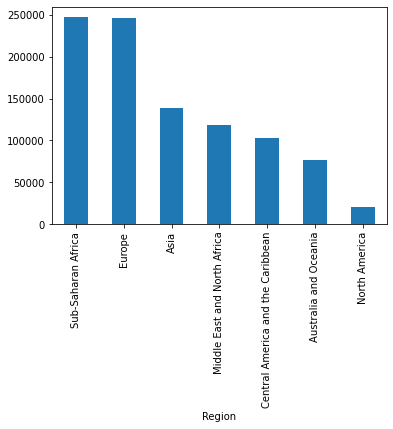

In [29]:
df.groupby('Region').size().sort_values(ascending=False).plot.bar()
df.groupby('Region').size().sort_values(ascending=False)

In [31]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [32]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [33]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date                object
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

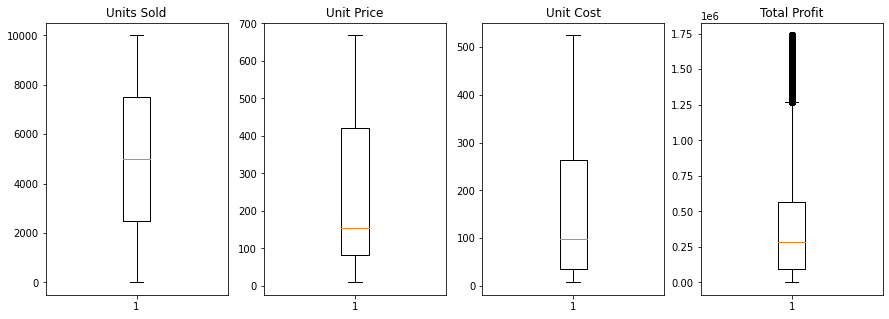

In [48]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
axs[0].boxplot(df['Units Sold'])
axs[0].set_title('Units Sold')
axs[1].boxplot(df['Unit Price'])
axs[1].set_title('Unit Price')
axs[2].boxplot(df['Unit Cost'])
axs[2].set_title('Unit Cost')
axs[3].boxplot(df['Total Profit'])
axs[3].set_title('Total Profit')

plt.show()